<a href="https://colab.research.google.com/github/yusrilihza69/Kuis-1/blob/main/UAS%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 6s (827 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

In [ ]:
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (771 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ind.
(Reading databa

In [ ]:
import re
import cv2 as cv
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

(<Axes: >, <matplotlib.image.AxesImage at 0x7ea9ed57c130>)

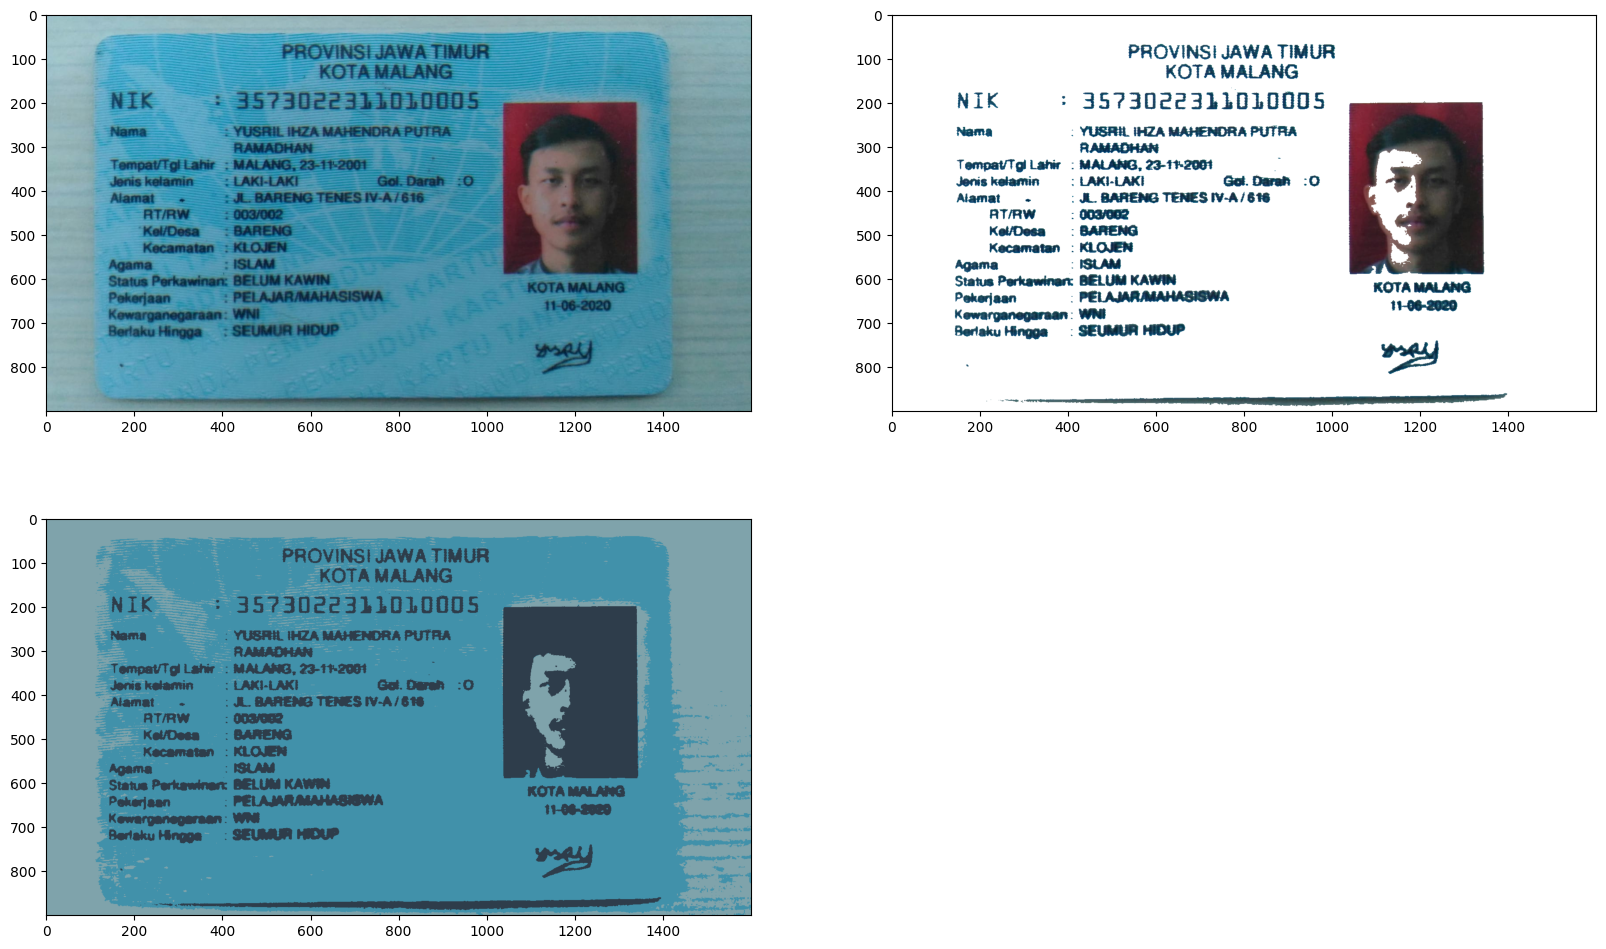

In [ ]:
# Kmeans Image Segmentation
img = cv.imread('/content/KTP1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape array ke bentuk 2D
pixel_val = img.reshape((-1, 3))
# convert to float
pixel_val = np.float32(pixel_val)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv.kmeans(pixel_val, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# Konversi titik centroid ke dalam Integer
centers = np.uint8(centers)
# flattening label array
labels = labels.flatten()
# konversi warna pixel asli ke warna dari tiap centroidnya
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

masked_img = np.copy(img)
masked_img = masked_img.reshape((-1, 3))
# cluster = 2
masked_img[labels != 2] = [255, 255, 255]
masked_img = masked_img.reshape(img.shape)

plt.figure(figsize = (20, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(masked_img)
plt.subplot(2, 2, 3), plt.imshow(segmented_img)

In [ ]:
gray = cv.cvtColor(segmented_img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

PROVINSI JAWA TIMUR

 

KOTA MALANG
NIK : 3573000311010005
Nama : YUSBHL IHZA MAHENDRA PUTRA
RAMADHAN

Tempat/Tgi Lahir : MALANG, 23-11-2001 "
Joris kelamin 1 LAKI-LAKI Got. Darah :O
Alamat - 1 JL BARENG TENES IV-A/616

ATaw 1 O0YGER

Kel/Desa 1 BARERS

Kecamatan : KLOJEN
Agama 1 ISLAM one
Status Perkawinan BELUM KAWIN KOTA MALANG
Pekerjaan : PELAJARMAHASISWA 11-08-2000

Kewarganegaraan : WNI
Berlaku Hingga —: SEUMUR HIDUP

 

